<h1 align="center">Assignment 3</h1>
<h2 align="center">Programming Machine Learning Applications [DSC 478]</h2>
<h3 align="center">Jonesh Shrestha (2222011)</h3>


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. **Regression Analysis**

#### For this problem you will experiment with multiple linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model hyperparameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "**ViolentCrimesPerPop**". **Note:** The two identifier attributes "state" and "community name" should be excluded for the regression task.

#### Your tasks in this problem are the following.


#### a. **[5 pts]** Load and preprocess the data using Pandas and remove the unneeded attributes. For the purpose of this assignment you do not need to normalize or standardize the data unless explicitly required in one of the following tasks. However, you may need to handle missing values by imputing those values based on variable means. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set. Separate the target attribute for regression. Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data (**important note**: for reproducible output across multiple runs, please use **"random_state = 33"**). Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.


In [79]:
communities_df = pd.read_csv("communities/communities.csv")
communities_df.head(10)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,6,SouthPasadenacity,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,...,0.00,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,44,Lincolntown,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,...,0.00,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,6,Selmacity,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,...,0.00,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,21,Hendersoncity,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,...,0.00,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,29,Claytoncity,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.00,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [80]:
comm_clean_df = communities_df.drop(columns=["state", "communityname"])
comm_clean_df.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.00,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.00,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.00,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.00,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.15


In [81]:
# setting to display all the rows, to view all attributes (series)
# pd.set_option('display.max_rows', None)

comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

Series([], dtype: int64)

In [82]:
comm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome              1994 non-null   float64
 13  pctWWage               1994 non-null   float64
 14  pctWFarmSelf           1994 non-null   float64
 15  pctW

In [83]:
# -- OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal) from dataset description
# but it's object type so there is a possible chance of this data having missing values
comm_clean_df["OtherPerCap"].unique()

array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?',
       '0.39', '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1',
       '0.46', '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77',
       '0.69', '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59',
       '0.01', '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49',
       '0.56', '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79',
       '0.99', '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65',
       '0.89'], dtype=object)

In [84]:
# imputing those '?' values based on variable means
comm_clean_df = comm_clean_df.replace("?", np.nan)
comm_clean_df["OtherPerCap"] = comm_clean_df["OtherPerCap"].astype("float64")
comm_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   float64
 1   householdsize          1994 non-null   float64
 2   racepctblack           1994 non-null   float64
 3   racePctWhite           1994 non-null   float64
 4   racePctAsian           1994 non-null   float64
 5   racePctHisp            1994 non-null   float64
 6   agePct12t21            1994 non-null   float64
 7   agePct12t29            1994 non-null   float64
 8   agePct16t24            1994 non-null   float64
 9   agePct65up             1994 non-null   float64
 10  numbUrban              1994 non-null   float64
 11  pctUrban               1994 non-null   float64
 12  medIncome              1994 non-null   float64
 13  pctWWage               1994 non-null   float64
 14  pctWFarmSelf           1994 non-null   float64
 15  pctW

In [85]:
comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

OtherPerCap    1
dtype: int64

In [86]:
comm_clean_df["OtherPerCap"] = comm_clean_df["OtherPerCap"].fillna(
    comm_clean_df["OtherPerCap"].mean()
)
comm_clean_df.isna().sum()[comm_clean_df.isna().sum() > 0]

Series([], dtype: int64)

In [87]:
# Compute and display basic statistics (mean, standard deviation, min, max, etc.) for the variables in the data set
comm_clean_df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,...,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00
mean,0.06,0.46,0.18,0.75,0.15,0.14,0.42,0.49,0.34,0.42,...,0.02,0.22,0.61,0.54,0.63,0.65,0.07,0.23,0.16,0.24
std,0.13,0.16,0.25,0.24,0.21,0.23,0.16,0.14,0.17,0.18,...,0.10,0.23,0.20,0.18,0.20,0.20,0.11,0.20,0.23,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.01,0.35,0.02,0.63,0.04,0.01,0.34,0.41,0.25,0.30,...,0.00,0.06,0.47,0.42,0.52,0.56,0.02,0.10,0.02,0.07
50%,0.02,0.44,0.06,0.85,0.07,0.04,0.40,0.48,0.29,0.42,...,0.00,0.13,0.63,0.54,0.67,0.70,0.04,0.17,0.07,0.15
75%,0.05,0.54,0.23,0.94,0.17,0.16,0.47,0.54,0.36,0.53,...,0.00,0.28,0.78,0.66,0.77,0.79,0.07,0.28,0.19,0.33
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [88]:
comm_target_df = comm_clean_df[["ViolentCrimesPerPop"]]
comm_target_df.head(5)

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


In [89]:
comm_clean_df.drop(columns=["ViolentCrimesPerPop"], inplace=True)
comm_clean_df.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [90]:
# Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    comm_clean_df, comm_target_df, test_size=0.2, random_state=33
)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1595, 97)
X_test shape: (399, 97)
y_train shape: (1595,)
y_test shape: (399,)


_I loaded the CSV dataset and dropped the unneeded attributes for regression: "state" and "communityname". Then I checked for missing values using isna(), but since there were none initially visible, I examined the datatypes of the attributes to determine if any characters like '?' or '*' were used to represent missing values. Since OtherPerCap was of object type while all other columns were float, I checked for unique values in that column and found that '?' was representing the missing values. I replaced '?' with NaN, converted the column to float64, and used fillna() to replace the missing values with the column mean. Then I computed basic statistics (mean, standard deviation, min, max, etc.) for the variables in the dataset using describe() and used scikit-learn's train_test_split function to create a 20%-80% randomized split with random_state=33 for reproducibility. I used .ravel() to convert the target arrays into 1D arrays as expected by sklearn models._

#### b. **[10 pts]** Perform **standard multiple linear regression** on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the **KFold** module from **sklearn.model_selection**).


In [91]:
# create a function to measure the perfomance of the model
from sklearn.metrics import root_mean_squared_error


def measure_performance(X, y, model, metric=root_mean_squared_error):
    y_pred = model.predict(X)
    score = metric(y, y_pred)
    return score

In [92]:
# Perform standard multiple linear regression on data using the scikit-learn Linear Regression module
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)

for i in range(10):
    print(f"Actual Value: {y_train[i]}, Predicted Value: {y_pred_train[i]:.4f}")

Actual Value: 0.08, Predicted Value: -0.0306
Actual Value: 0.4, Predicted Value: 0.6268
Actual Value: 0.02, Predicted Value: -0.0737
Actual Value: 0.18, Predicted Value: 0.1154
Actual Value: 0.07, Predicted Value: 0.0708
Actual Value: 0.33, Predicted Value: 0.4414
Actual Value: 0.56, Predicted Value: 0.7031
Actual Value: 0.15, Predicted Value: 0.1242
Actual Value: 0.22, Predicted Value: 0.2300
Actual Value: 0.76, Predicted Value: 0.4887


In [93]:
# Compute the RMSE values on the full training data (the 80% partition)
train_rmse = measure_performance(X_train, y_train, linreg)

print(f"The RMSE value on the full training data is: {train_rmse}")

The RMSE value on the full training data is: 0.1261959313342669


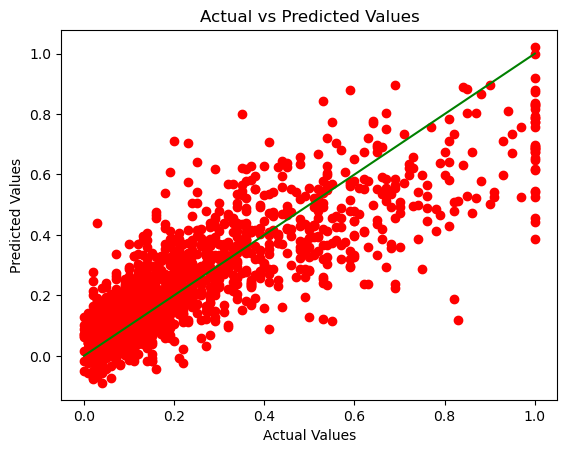

In [94]:
# plot the correlation between the predicted and actual values of the target attribute
plt.scatter(y_train, y_pred_train, c="r")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "g-")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

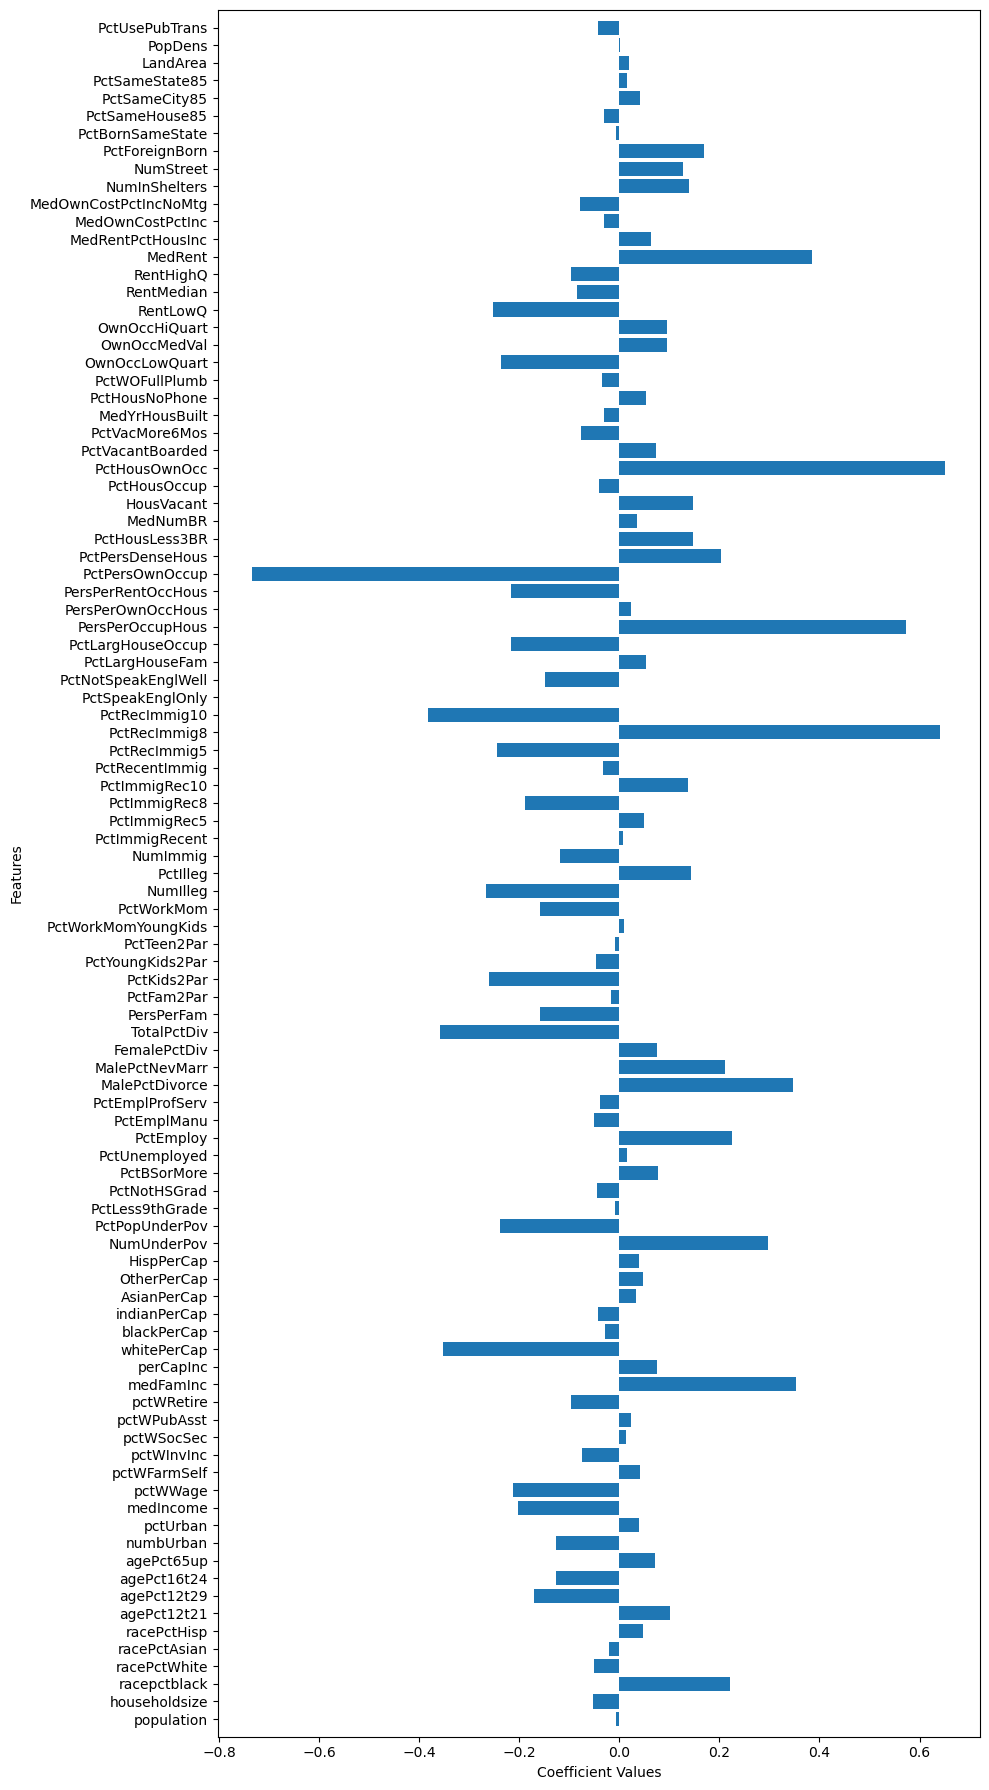

In [95]:
# Display the obtained regression coefficients (weights) and plot them using matplotlib.
categories = comm_clean_df.columns.to_numpy()
weights = (linreg.coef_).flatten()

plt.figure(figsize=(10, 18))
plt.barh(categories, weights)
plt.xlabel("Coefficient Values")
plt.ylabel("Features")
plt.ylim(-1, len(categories))
plt.tight_layout()

In [96]:
# perform 10-fold cross-validation on the training partition
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
curr_fold = 1
total_rmse = []
for train_idx, test_idx in kf.split(X_train):
    linreg.fit(X_train.iloc[train_idx], y_train[train_idx])
    p_rmse = measure_performance(X_train.iloc[test_idx], y_train[test_idx], linreg)

    print(f"Fold {curr_fold}, RMSE: {p_rmse:.4f}")
    total_rmse.append(p_rmse)
    curr_fold += 1

Fold 1, RMSE: 0.1437
Fold 2, RMSE: 0.1385
Fold 3, RMSE: 0.1330
Fold 4, RMSE: 0.1360
Fold 5, RMSE: 0.1351
Fold 6, RMSE: 0.1323
Fold 7, RMSE: 0.1192
Fold 8, RMSE: 0.1216
Fold 9, RMSE: 0.1367
Fold 10, RMSE: 0.1468


In [97]:
print(f"10-fold Cross Validation RMSE: {np.mean(total_rmse):.4f}")
print(f"Training RMSE: {train_rmse:.4f}")

10-fold Cross Validation RMSE: 0.1343
Training RMSE: 0.1262


_First, I created a measure_performance function as suggested in class that takes X, y, model, and metric (default: root_mean_squared_error). Then I trained the linear regression model on the training data and calculated predictions on the training set. I used the measure_performance function to calculate the RMSE on the training data (0.1262). Then I plotted the correlation between predicted and actual values of the training set. Next, I displayed the regression coefficients (weights) using a horizontal bar chart with matplotlib. Then I used KFold to perform 10-fold cross-validation on the training partition. The cross-validation RMSE (0.1343) is slightly higher than the training RMSE (0.1262), which is expected since the model performs better on data it was trained on. The small gap suggests the model generalizes reasonably well without severe overfitting._

#### c. **[15 pts] Feature Selection**: use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use **feature_selection.SelectPercentile** to find the most informative variables for a range of percentile values [**Note**: since this is regression not classification, in the **SelectPercentile** function you should use **feature_selection.f_regression** as scoring function rather than **chi2**). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. You will use RMSE as the error metric. For cross-validation, use scikit's **cross_val_score** function. In order to use **cross_val_score** with regression you'll need to pass to it a specific error function. In this case, you will use **scoring='neg_root_mean_squared_error'** as a parameter. You should use absolute values to convert these negated RMSE values to positive RMSE values. Your plot should look similar to this example (which shows MAE values instead of RMSE values for a similar dataset). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute its performance (again using RMSE) on the set-aside 20% test partition.


In [98]:
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score

percentiles = range(1, 100, 5)


def best_features(train, target, reg_model):
    results = []
    for percentile in percentiles:
        fs = SelectPercentile(f_regression, percentile=percentile)
        X_train_fs = fs.fit_transform(train, target)
        scores = cross_val_score(
            reg_model, X_train_fs, target, cv=5, scoring="neg_root_mean_squared_error"
        )
        fs_rmse = abs(scores.mean())
        print(f"Percentile: {percentile}, RMSE: {fs_rmse:.4f}")
        results.append(fs_rmse)
    return results

In [99]:
results = best_features(X_train, y_train, linreg)
results = np.array(results, dtype=float)

Percentile: 1, RMSE: 0.1546
Percentile: 6, RMSE: 0.1439
Percentile: 11, RMSE: 0.1422
Percentile: 16, RMSE: 0.1413
Percentile: 21, RMSE: 0.1392
Percentile: 26, RMSE: 0.1372
Percentile: 31, RMSE: 0.1357
Percentile: 36, RMSE: 0.1356
Percentile: 41, RMSE: 0.1355
Percentile: 46, RMSE: 0.1358
Percentile: 51, RMSE: 0.1359
Percentile: 56, RMSE: 0.1357
Percentile: 61, RMSE: 0.1354
Percentile: 66, RMSE: 0.1353
Percentile: 71, RMSE: 0.1355
Percentile: 76, RMSE: 0.1347
Percentile: 81, RMSE: 0.1345
Percentile: 86, RMSE: 0.1345
Percentile: 91, RMSE: 0.1346
Percentile: 96, RMSE: 0.1344


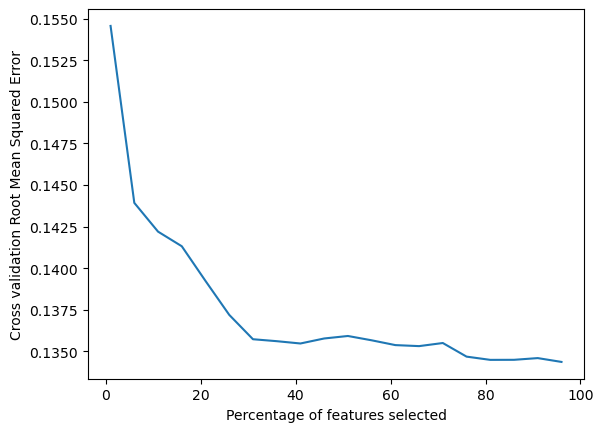

In [100]:
plt.plot(list(percentiles), results)
plt.xlabel("Percentage of features selected")
plt.ylabel("Cross validation Root Mean Squared Error")
plt.show()

In [101]:
print(f"Best (lowest) RMSE on cross-validation: {min(results):.4f}")

Best (lowest) RMSE on cross-validation: 0.1344


In [102]:
optimal_percentile_ind = np.where(results == results.min())[0][0]
print(f"Optimal percentile of features: {percentiles[optimal_percentile_ind]}")
optimal_num_features = int(
    percentiles[optimal_percentile_ind] * len(X_train.columns) / 100
)
print(f"Optimal number of features: {optimal_num_features}")

Optimal percentile of features: 96
Optimal number of features: 93


In [103]:
# displaying corresponding best features
fs_best_features = SelectPercentile(
    f_regression, percentile=percentiles[optimal_percentile_ind]
)
X_train_fs = fs_best_features.fit_transform(X_train, y_train)
X_test_fs = fs_best_features.transform(X_test)

best_features = X_train.columns[fs_best_features.get_support()].values
print(f"The corresponding best features are: {best_features}")

The corresponding best features are: ['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctHisp'
 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up' 'numbUrban'
 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'MalePctDivorce' 'MalePctNevMarr' 'FemalePctDiv'
 'TotalPctDiv' 'PersPerFam' 'PctFam2Par' 'PctKids2Par' 'PctYoungKids2Par'
 'PctTeen2Par' 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig'
 'PctImmigRecent' 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10'
 'PctRecentImmig' 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10'
 'PctSpeakEnglOnly' 'PctNotSpeakEnglWell' 'PctLargHouseFam'
 'PctLargHouseOccup' 'PersPerOccupHous' 'PersPerOwnOccHous'
 'PersPerRentOccHous' 'PctPersOwnOc

In [104]:
X_train_fs

array([[0.01, 0.54, 0.02, ..., 0.01, 0.2 , 0.47],
       [0.99, 0.42, 0.59, ..., 0.28, 0.55, 0.62],
       [0.01, 0.53, 0.02, ..., 0.11, 0.03, 0.09],
       ...,
       [0.02, 0.48, 0.23, ..., 0.01, 0.47, 0.98],
       [0.01, 0.56, 0.09, ..., 0.02, 0.19, 0.01],
       [0.96, 0.32, 1.  , ..., 0.18, 0.83, 1.  ]], shape=(1595, 93))

In [105]:
X_test_fs

array([[0.  , 0.46, 0.01, ..., 0.04, 0.06, 0.03],
       [0.01, 0.35, 0.01, ..., 0.03, 0.11, 0.01],
       [0.51, 0.31, 0.6 , ..., 0.12, 0.68, 0.75],
       ...,
       [0.06, 0.36, 0.37, ..., 0.03, 0.42, 1.  ],
       [0.01, 0.48, 0.01, ..., 0.02, 0.18, 0.01],
       [0.07, 0.32, 0.99, ..., 0.02, 0.54, 0.71]], shape=(399, 93))

In [106]:
fs_linreg = LinearRegression()
fs_linreg.fit(X_train_fs, y_train)

fs_rsme = measure_performance(X_test_fs, y_test, fs_linreg)
print(f"RMSE with optimal subset of features on test partition: {fs_rsme:.4f}")

RMSE with optimal subset of features on test partition: 0.1438


_First, I created a best_features function that takes the training data, target variable, and regression model as inputs. The function uses SelectPercentile with f_regression to score features across different percentile values (1 to 96 in steps of 5). For each percentile, I used fit_transform to create a reduced feature set and calculated the cross-validation RMSE using cross_val_score with 5 folds and 'neg_root_mean_squared_error' scoring. I took the absolute value of the mean score to get the positive RMSE and stored the results. After plotting percentiles vs RMSE, I found the optimal percentile was 96%, corresponding to 93 features out of 97 total features. I then used SelectPercentile with this optimal percentile to transform both X_train and X_test, keeping only the 93 best features. Using get_support(), I retrieved the names of the selected features. Finally, I trained a new linear regression model on the selected features and evaluated it on the test set. One important note: this implementation introduces slight data leakage since SelectPercentile is fit on the entire training set before cross-validation splits it. A more rigorous approach would use Pipeline to re-fit the feature selector inside each fold._

#### d. **[10 pts]** Next, using the original train and test data in part (a), perform **Ridge Regression and Lasso Regression** using the modules from **sklearn.linear_model**. In each case, perform systematic **model selection** to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (again using RMSE as the error metric) on the training and cross-validation splits across the specified values of **alpha**. Finally, using the best **alpha** values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off.


In [107]:
def calc_params(X, y, clf, param_values, param_name, K):

    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))

    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(f"{param_name} = {param_value:.4f}")

        # set classifier parameters
        clf.set_params(**{param_name: param_value})

        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)

        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)

        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = measure_performance(X[train], y[train], clf)
            k_test_scores[j] = measure_performance(X[test], y[test], clf)
            j += 1

        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)

    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label="Train", alpha=0.4, lw=2, c="b")
    plt.plot(param_values, test_scores, label="X-Val", alpha=0.4, lw=2, c="g")
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation RMSE")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [108]:
ridge_range = np.linspace(0.001, 10, 20)
ridge_range

array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01])

alpha = 0.0010
alpha = 0.5273
alpha = 1.0535
alpha = 1.5798
alpha = 2.1061
alpha = 2.6323
alpha = 3.1586
alpha = 3.6848
alpha = 4.2111
alpha = 4.7374
alpha = 5.2636
alpha = 5.7899
alpha = 6.3162
alpha = 6.8424
alpha = 7.3687
alpha = 7.8949
alpha = 8.4212
alpha = 8.9475
alpha = 9.4737
alpha = 10.0000


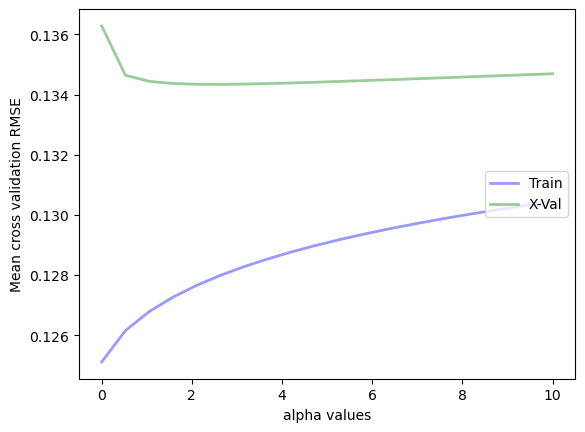

In [109]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge()
ridge_train_scores, ridge_test_scores = calc_params(
    X_train, y_train, ridge_reg, ridge_range, "alpha", 5
)

In [110]:
# the best alpha value for Ridge Regression
ridge_best_alpha_idx = np.argmin(ridge_test_scores)
ridge_best_alpha = ridge_range[ridge_best_alpha_idx]
print(
    f"Best alpha for Ridge Regression: {ridge_best_alpha:.4f} with lowest RMSE: {ridge_test_scores[ridge_best_alpha_idx]:.4f}"
)

Best alpha for Ridge Regression: 2.6323 with lowest RMSE: 0.1343


In [111]:
lasso_range = np.linspace(0.0001, 0.01, 20)
lasso_range

array([0.0001    , 0.00062105, 0.00114211, 0.00166316, 0.00218421,
       0.00270526, 0.00322632, 0.00374737, 0.00426842, 0.00478947,
       0.00531053, 0.00583158, 0.00635263, 0.00687368, 0.00739474,
       0.00791579, 0.00843684, 0.00895789, 0.00947895, 0.01      ])

alpha = 0.0001
alpha = 0.0006
alpha = 0.0011
alpha = 0.0017
alpha = 0.0022
alpha = 0.0027
alpha = 0.0032
alpha = 0.0037
alpha = 0.0043
alpha = 0.0048
alpha = 0.0053
alpha = 0.0058
alpha = 0.0064
alpha = 0.0069
alpha = 0.0074
alpha = 0.0079
alpha = 0.0084
alpha = 0.0090
alpha = 0.0095
alpha = 0.0100


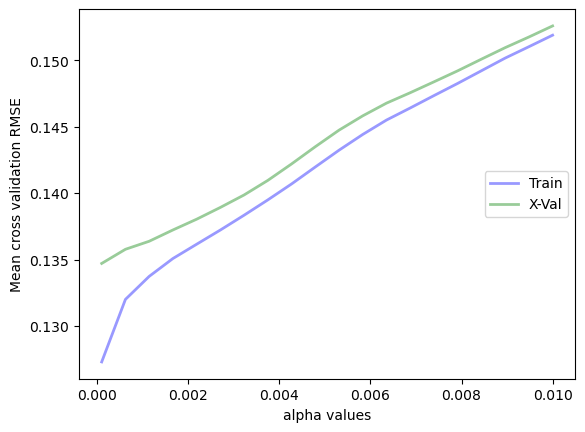

In [112]:
lasso_reg = Lasso()
lasso_train_scores, lasso_test_scores = calc_params(
    X_train, y_train, lasso_reg, lasso_range, "alpha", 5
)

In [113]:
# the best alpha value for Lasso Regression
lasso_best_alpha_idx = np.argmin(lasso_test_scores)
lasso_best_alpha = lasso_range[lasso_best_alpha_idx]
print(f"Best alpha for Lasso Regression: {lasso_best_alpha:.4f} with lowest RMSE: {lasso_test_scores[lasso_best_alpha_idx]:.4f}")

Best alpha for Lasso Regression: 0.0001 with lowest RMSE: 0.1347


In [114]:
best_ridge_reg = Ridge(alpha=ridge_best_alpha)
best_ridge_reg.fit(X_train, y_train)
ridge_best_rsme = measure_performance(X_test, y_test, best_ridge_reg)
print(f"RMSE on test data using alpha: {ridge_best_alpha:.4f} for Ridge Regression is {ridge_best_rsme:.4f}")

RMSE on test data using alpha: 2.6323 for Ridge Regression is 0.1440


In [115]:
best_lasso_reg = Lasso(alpha=lasso_best_alpha)
best_lasso_reg.fit(X_train, y_train)
lasso_best_rsme = measure_performance(X_test, y_test, best_lasso_reg)
print(
    f"RMSE on test data using alpha: {lasso_best_alpha:.4f} for Lasso Regression is {lasso_best_rsme:.4f}"
)

RMSE on test data using alpha: 0.0001 for Lasso Regression is 0.1436


_I created the calc_params function (based on class materials), modifying it to use my custom measure_performance function that calculates RMSE by default. The function iterates over parameter values, performing K-fold cross-validation for each value, and stores the mean training scores and cross-validation scores. I created different ranges for Ridge and Lasso since their alpha values operate at different scales: Ridge from 0.001 to 10, and Lasso from 0.0001 to 0.01. I optimized to find the alpha that minimizes cross-validation RMSE. The best alpha for Ridge was 2.6323 (CV RMSE: 0.1343, Test RMSE: 0.1440) and for Lasso was 0.0001 (CV RMSE: 0.1347, Test RMSE: 0.1436)._

_From the graphs, I observed the bias-variance tradeoff: When alpha is very small, the penalty is weak and the model fits the training data very closely, resulting in low training RMSE but higher cross-validation RMSE with a significant gap, suggesting overfitting (low bias but high variance). As alpha increases, the gap between training and cross-validation RMSE decreases, indicating the model generalizes better, bias increases while variance decreases. However, with excessive regularization (very large alpha), both training and cross-validation RMSE increase, indicating underfitting where the model is too constrained to capture the underlying patterns. The optimal alpha values represent the best balance between bias and variance, where cross-validation RMSE is minimized._

#### e. **[10 pts]** Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that **SGDRegessor** requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fitting the model, perform the scaling using **StandardScaler** from **sklearn.preprocessing**. For this problem, perform a grid search (using **GridSearchCV** from **sklearn.grid_search**). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing training and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. [**Note**: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1; l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training performance. Provide a brief summary of your findings from the above experiments.


In [116]:
from sklearn.preprocessing import StandardScaler

# scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

sgd_reg = SGDRegressor()

parameters = {"penalty": ["l1", "l2"], "alpha": np.linspace(0.0001, 10, 20)}

grid_search = GridSearchCV(sgd_reg, parameters, verbose=1, cv=5)

In [118]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,estimator,SGDRegressor()
,param_grid,"{'alpha': array([1.0000...00000000e+01]), 'penalty': ['l1', 'l2']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [119]:
grid_search.best_params_
gs_best_alpha = grid_search.best_params_["alpha"]
gs_best_penalty = grid_search.best_params_["penalty"]
print(f"The best alpha value is {gs_best_alpha}")
print(f"The best penalty value is {gs_best_penalty}")

The best alpha value is 0.0001
The best penalty value is l1


In [120]:
best_sgd_reg = SGDRegressor(alpha=gs_best_alpha, penalty=gs_best_penalty)
best_sgd_reg.fit(X_train_scaled, y_train)

best_sgd_reg_rsme_train = measure_performance(X_train_scaled, y_train, best_sgd_reg)
best_sgd_reg_rsme_test = measure_performance(X_test_scaled, y_test, best_sgd_reg)

print(f"Train RMSE score for train data using SGDRegessor is {best_sgd_reg_rsme_train:.4f}")
print(f"Test RMSE score for test data using SGDRegessor is {best_sgd_reg_rsme_test:.4f}")

Train RMSE score for train data using SGDRegessor is 0.1301
Test RMSE score for test data using SGDRegessor is 0.1456


In [121]:
l1_ratio_range = np.linspace(0, 1, 21)
l1_ratio_range

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

l1_ratio = 0.0000
l1_ratio = 0.0500
l1_ratio = 0.1000
l1_ratio = 0.1500
l1_ratio = 0.2000
l1_ratio = 0.2500
l1_ratio = 0.3000
l1_ratio = 0.3500
l1_ratio = 0.4000
l1_ratio = 0.4500
l1_ratio = 0.5000
l1_ratio = 0.5500
l1_ratio = 0.6000
l1_ratio = 0.6500
l1_ratio = 0.7000
l1_ratio = 0.7500
l1_ratio = 0.8000
l1_ratio = 0.8500
l1_ratio = 0.9000
l1_ratio = 0.9500
l1_ratio = 1.0000


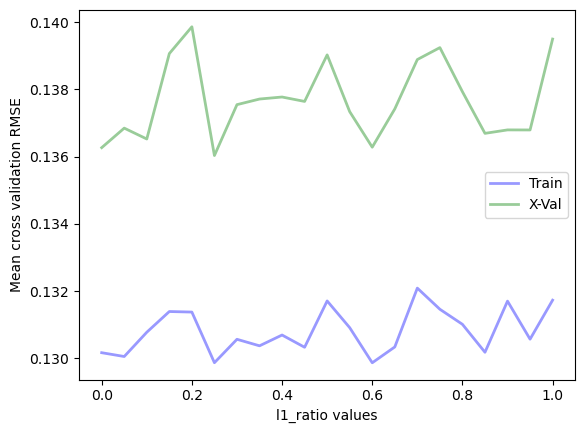

In [122]:
elasticnet_sgd_reg = SGDRegressor(penalty="elasticnet")

sgd_reg_train_scores, sgd_reg_test_scores = calc_params(X_train_scaled, y_train, elasticnet_sgd_reg, l1_ratio_range, "l1_ratio", 5)

In [123]:
# the best l1_ratio value for SGDRegressor
elasticnet_best_l1ratio_idx = np.argmin(sgd_reg_test_scores)
elasticnet_best_l1ratio = l1_ratio_range[elasticnet_best_l1ratio_idx]
print(f"Best l1_ratio for SGDRegressor: {elasticnet_best_l1ratio:.4f} with lowest RMSE: {sgd_reg_test_scores[elasticnet_best_l1ratio_idx]:.4f}")

Best l1_ratio for SGDRegressor: 0.2500 with lowest RMSE: 0.1360


In [124]:
best_elasticnet_sgd_reg = SGDRegressor(penalty="elasticnet", l1_ratio=elasticnet_best_l1ratio)
best_elasticnet_sgd_reg.fit(X_train_scaled, y_train)

elasticnet_best_rsme_train = measure_performance(X_train_scaled, y_train, best_elasticnet_sgd_reg)
elasticnet_best_rsme_test = measure_performance(X_test_scaled, y_test, best_elasticnet_sgd_reg)

print(f"RMSE on training data using l1_ratio: {elasticnet_best_l1ratio:.4f} for SGDRegressor using ElasticNet is {elasticnet_best_rsme_train:.4f}")
print(f"RMSE on test data using l1_ratio: {elasticnet_best_l1ratio:.4f} for SGDRegressor using ElasticNet is {elasticnet_best_rsme_test:.4f}")

RMSE on training data using l1_ratio: 0.2500 for SGDRegressor using ElasticNet is 0.1314
RMSE on test data using l1_ratio: 0.2500 for SGDRegressor using ElasticNet is 0.1471


_First, I used StandardScaler to standardize the features (mean=0, standard deviation=1) as required by SGDRegressor. I fit the scaler on X_train and transformed both X_train and X_test using the same scaler. Then I created an SGDRegressor object and used GridSearchCV to search over combinations of penalties ['l1', 'l2'] and alpha values (from 0.0001 to 10) with 5-fold cross-validation (cv=5). The best parameters found were alpha=0.0001 and penalty='l1', achieving train RMSE of 0.1301 and test RMSE of 0.1456._

_Next, I used the calc_params() function from question (d) to find the best l1_ratio for the ElasticNet penalty by testing values from 0 to 1. The best l1_ratio was 0.25 (CV RMSE: 0.1360), with train RMSE of 0.1314 and test RMSE of 0.1471._

_Comparing across all methods:_

- _Standard Multiple Linear Regression (b): Train RMSE 0.1262, CV RMSE 0.1343_
- _Feature Selection (c): CV RMSE 0.1344, Test RMSE 0.1438_
- _Ridge (d): CV RMSE 0.1343, Test RMSE 0.1440_
- _Lasso (d): CV RMSE 0.1347, Test RMSE 0.1436_
- _SGD with L1 (e): Train RMSE 0.1301, Test RMSE 0.1456_
- _SGD ElasticNet (e): Train RMSE 0.1314, Test RMSE 0.1471_

_The SGDRegressor performs comparably to Ridge/Lasso but with slightly higher test error (0.1456 vs 0.1436-0.1440). The gap between train and test RMSE for SGD (approximately 0.015) is similar to other methods, indicating reasonable generalization. The ElasticNet with l1_ratio=0.25 performs slightly worse than pure L1 (0.1471 vs 0.1456 test RMSE). The optimal mixing ratio of 0.25 suggests that a balanced mix (25% L1, 75% L2) still doesn't improve over pure L1 regularization for this dataset. This indicates that either pure L1's feature selection or pure L2's shrinkage is more effective than a hybrid approach. Due to the stochastic nature of SGDRegressor, my results varied slightly between different runs._

### 2. **Document Clustering**

#### For this problem you will use a subset of the data from the BBC News Website. The data consists of 2,225 documents from the BBC news corresponding to stories in five topical categories from 2004-2005. The categories are: **business, entertainment, politics, sport,** and **tech**. The dataset for this assignment includes a document x term matrix based on 6,167 features used to represent the 2,225 documents. The entries in the matrix represent term frequencies for each term in each document. The dataset also includes the set of features, the class labels (category names) for each document, as well as the full textual data before preprocessing. Please review the README file in the archive for more details. The main task in this problem is to use an unsupervised clustering algorithm to cluster the documents, and then evaluate the results to see how closely the clusters capture the actual category assignments.

#### Your tasks in this problem are the following.


#### a. **[10 pts]** Load the document x term matrix as well as the set of features and class labels into appropriate data structures. As in the previous assignment, create a plot of term frequencies across the whole dataset ranked from highest to lowest. Then use the **train_test_split** function (**with random_state = 99**) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part.


In [125]:
tf_df = pd.read_csv("BBC_News_5_Categories/BBC_News_5_TF.csv", index_col=0)
features_df = pd.read_csv("BBC_News_5_Categories/BBC_News_5_Features.csv", header=None)
classes_df = pd.read_csv(
    "BBC_News_5_Categories/BBC_News_5_Classes.csv", header=None, index_col=0
)

In [126]:
tf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
features_df.head()

,0
0,aaa
1,aaron
2,abandon
3,abba
4,abbott


In [128]:
classes_df.head()

,1
0,
0,business
1,business
2,business
3,business
4,business


In [129]:
term_frequencies = tf_df.sum(axis=1)
term_frequencies.head(10)

0    207
1    190
2    140
3    187
4    104
5     92
6    131
7    158
8    114
9    113
dtype: int64

In [130]:
tf_sorted = term_frequencies.sort_values(ascending=False)
tf_sorted.head(20)

1185    1763
762     1514
1275    1386
2224    1180
1188    1105
765     1017
862      924
1683     779
1803     687
2202     636
2011     580
877      570
640      562
1424     545
1433     545
2219     520
2124     516
1832     509
1430     480
2222     462
dtype: int64

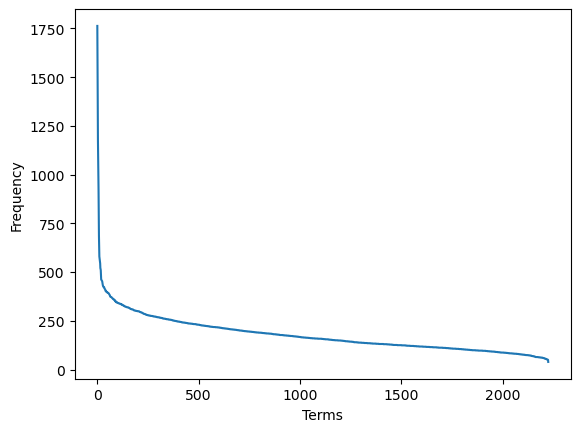

In [131]:
plt.plot(sorted(term_frequencies, reverse=True))
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.show()

In [132]:
classes_np = classes_df.to_numpy().ravel()
classes_np.shape

(2225,)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    tf_df, classes_np, test_size=0.2, random_state=99
)

In [134]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (1780, 6167)
y_train Shape: (1780,)
X_test Shape: (445, 6167)
y_test Shape: (445,)


_First, I imported the document x term matrix as well as the set of features and class labels appropriately. Then, similar to my assignment 2, I created a plot of term frequencies across the whole dataset ranked from highest to lowest, which follows the expected Zipf's law distribution. I then used train_test_split to create training and testing sets for the clustering problem. Even though clustering is unsupervised learning, a testing set is created to evaluate how well the clustering captures the actual categories._

#### b. **[10 pts]** Perform Kmeans clustering on the training data from part (a) [**Note**: for this problem, use the proprietary implementation of the Kmeans clustering module provided in the file KMeans-2025.zip. Do not use the Scikit-learn Kmeans module.]  Display the cluster sizes as well as a data frame depicting the cluster centroid vectors. You can use the function provided in the **K_Means.py** module or create your own to display these results after clustering. Create your own function to display the documents in each cluster including document ids, document titles, and the original category name assigned to that document.

In [135]:
# proprietary implementation of the Kmeans clustering module

import numpy as np
import pandas as pd
from scipy.spatial import distance
import numpy.ma as ma

np.set_printoptions(linewidth=100, precision=2, suppress=True)
pd.options.display.float_format = "{:.2f}".format
pd.set_option("max_colwidth", 100)

#########################################


def kmeans(Data, K=3, max_iterations=20, metric="cosine", mask_zeros=False):
    """
    Data: N x M data matrix (2d numpy array) with N data instances in rows
          and M features (columns)
    K: number of clusters
    max_iterations: max number of iterations if no convergence
    metric: distnace metric - specific to scipy.spatial.distance
            (e.g., 'euclidean', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard')

    Return:
        clusters: numpy array of cluster labels for all data instances (rows in Data)
        centroids: K x M numpy array of K centroid vectors over the M features as dimensions
    """

    # Pick indices of k random instances without replacement as initial clusters
    idx = np.random.choice(len(Data), K, replace=False)
    centroids = Data[idx, :]

    # Obtain the index of the most similar cluster for each instance using a distance function
    clusters = np.argmin(distance.cdist(Data, centroids, metric), axis=1)

    for j in range(max_iterations):

        # print("Iteration:", j+1)
        centroids = np.zeros(
            (K, Data.shape[1])
        )  # initialize 2d numpy array for centorids

        for i in range(K):
            # Get all instances in current cluster
            cluster_i = Data[clusters == i, :]
            # Compute centroid for current cluster
            mc = ma.masked_array(cluster_i, mask=(cluster_i == 0))  # Mask zeros
            if mask_zeros:
                centroids[i] = mc.mean(axis=0)
            else:
                centroids[i] = cluster_i.mean(axis=0)

        # Find new clusters for each instance based distance to new centroids
        new_clusters = np.argmin(distance.cdist(Data, centroids, metric), axis=1)

        # If there was no change from last iteration, stop, otherwise use new clusters in next iteration
        if np.array_equal(clusters, new_clusters):
            break
        clusters = new_clusters

    return clusters, centroids


########################################


def cluster_sizes(Data, clusters):
    # Data is a 2d Numpy array containing the instances to be clustered as rows and features as columns
    # clusters is a Numpy array of cluster labels for each instance in the data

    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(Data[clusters == c])
    return size


########################################


def display_centroids(centroids, features):
    # centroids is a 2d Numpy array containing the centroid vectors as rows and features as columns
    # features is a Numpy array containing the feature set used to represent documents and clusters

    centDF = pd.DataFrame(centroids, columns=features)
    return (
        centDF  # return a Pandas Dataframe for more useful presentation of the results.
    )


########################################

In [136]:
X_train_np = X_train.to_numpy()
clusters, centroids = kmeans(X_train_np)
print(f"Clusters: {clusters}")
print(f"Centroids: {centroids}")

Clusters: [2 2 0 ... 0 2 0]
Centroids: [[0.01675978 0.00418994 0.01256983 ... 0.00558659 0.         0.00977654]
 [0.         0.         0.01598174 ... 0.01826484 0.         0.00684932]
 [0.00319489 0.         0.01757188 ... 0.00798722 0.00159744 0.00159744]]


In [137]:
clusterSize = cluster_sizes(X_train_np, clusters)
print(clusterSize)
for key, value in clusterSize.items():
    print(f"Cluster {key} has size: {value}")

{np.int64(0): 716, np.int64(1): 438, np.int64(2): 626}
Cluster 0 has size: 716
Cluster 1 has size: 438
Cluster 2 has size: 626


In [138]:
features_np = features_df.to_numpy().ravel()
centroids_df = display_centroids(centroids, features_np)
centroids_df

,aaa,aaron,abandon,abba,abbott,abc,abid,abil,abl,abn,...,zach,zealand,zeppelin,zero,zhang,zimbabw,zombi,zone,zoom,zurich
0,0.02,0.00,0.01,0.01,0.01,0.01,0.00,0.03,0.10,0.00,...,0.01,0.07,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01
1,0.00,0.00,0.02,0.00,0.00,0.01,0.01,0.03,0.07,0.02,...,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01
2,0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.09,0.24,0.00,...,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.00


In [139]:
bbc_news_df = pd.read_csv("BBC_News_5_Categories/bbc-5categories.csv")
bbc_news_df.head()

,doc_id,title,category,cat_id,text
0,0,Ad sales boost Time Warner profit,business,0,Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three mont...
1,1,Dollar gains on Greenspan speech,business,0,The dollar has hit its highest level against the euro in almost three months after the Federal R...
2,2,Yukos unit buyer faces loan claim,business,0,The owners of embattled Russian oil giant Yukos are to ask the buyer of its former production un...
3,3,High fuel prices hit BA's profits,business,0,British Airways has blamed high fuel prices for a 40% drop in profits. Reporting its results for...
4,4,Pernod takeover talk lifts Domecq,business,0,Shares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the t...


In [140]:
def display_news_clusters(train_instance_labels, train_titles, train_cats):

    clusters = sorted(set(train_instance_labels))

    for cluster in clusters:
        print(f"Cluster {cluster} :\n")

        cluster_idx = [
            i for i, label in enumerate(train_instance_labels) if label == cluster
        ]

        data = {
            "Doc-Id": cluster_idx,
            "Title": [train_titles[i] for i in cluster_idx],
            "Category": [train_cats[i] for i in cluster_idx],
        }

        data_df = pd.DataFrame(data)

        print(f"{data_df} \n\n")

In [141]:
title_np = bbc_news_df["title"].to_numpy().ravel()

display_news_clusters(clusters, title_np, classes_np)

Cluster 0 :

     Doc-Id                              Title  Category
0         2  Yukos unit buyer faces loan claim  business
1         3  High fuel prices hit BA's profits  business
2         8  Ethiopia's crop production up 24%  business
3        10  Ask Jeeves tips online ad revival  business
4        13   Telegraph newspapers axe 90 jobs  business
..      ...                                ...       ...
711    1764    Rochus shocks Coria in Auckland     sport
712    1767   Slovakia seal Hopman Cup success     sport
713    1776   Connors boost for British tennis     sport
714    1777  Henin-Hardenne beaten on comeback     sport
715    1779         Capriati to miss Melbourne     sport

[716 rows x 3 columns] 


Cluster 1 :

     Doc-Id                              Title  Category
0         4  Pernod takeover talk lifts Domecq  business
1         6   Jobs growth still slow in the US  business
2         7   India calls for fair trade rules  business
3        14   Air passengers win ne

_First, I used the proprietary implementation of the kmeans clustering module provided, then displayed the clusters, cluster centroids, and cluster sizes using that kmeans() function. I created my own function to display the documents in each cluster, including document IDs, document titles, and the original category name assigned to that document. The display_news_clusters function takes in the clusters, titles from the original bbc-5categories file, and categories. I first extracted the number of total clusters, and for each cluster, stored that cluster's indices and used those indices to get the corresponding titles and categories, converted them into a dataframe, and displayed the results._

#### c. **[15 pts]** Perform a qualitative analysis of the clusters by examining top features (terms) in each cluster and identifying patterns (e.g., top categories) captured in the clusters. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster **sorted by decreasing centroid weights** for each term in the cluster (mean frequency of the term in teh centroid). Your output should also display the cluster Document Frequency (DF) value for each of these the top N terms. The cluster DF value for a term **t** in a cluster **C** is the percentage of docs in cluster **C** in which term **t** appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). For each cluster, you should also display the cluster size (the number of documents in the cluster). Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of mean weights from the cluster centroids (the "Freq" column), but in addition the cluster DF values (both raw and as a percentage) are also shown).

#### **Important Note**: for this problem you should try several values of k for the number of clusters (try values of k from 4 through 8) and in each case try several runs in order to obtain clusters that seem more meaningful (note that for the same value of k, different runs may produce different clusters). In some cases, you may find some small clusters containing noise documents, which is not unusual. For higher values of k, you may also find the multiple clusters may capture similar patterns (such as documents from the same category). The point is to experiment with different runs and cluster numbers until you find at least several clusters that seem to capture some of the key topics in the documents. You also want to avoid documents that should belong to the same group being split across multiple clusters. You do not need to provide the results of all your runs; you should only provide the results of your best clustering along with a brief discussion of your experimentation and your final observations. [**Note**: this discussion is required to obtain full credit on this problem].

#### **[Extra Credit - 5 pts**: use your favorite third party tool or library to create a word cloud for each cluster (using your best clustering from earlier experiments.]


In [142]:
def cluster_report(data, cluster, centroids):

    clusterSize = cluster_sizes(data, cluster)
    cluster_dict = {}
    for cluster_label, cluster_size in clusterSize.items():
        print(f"Cluster {cluster_label} has size: {cluster_size}")

        label_idx = np.where(
            cluster == cluster_label
        )  # which position (index) in the cluster is the label
        cluster_tf = data[
            label_idx
        ]  # term-frequencies for each documents for that cluster

        # tf_sum = cluster_tf.sum(axis=0) # total frequency of a term over all the documents
        df = (cluster_tf > 0).sum(
            axis=0
        )  # total number of documents where term frequency is at least 1
        # freq = tf_sum / cluster_size # total frequency of terms for each document / total documents in the cluster
        pct_docs = (
            df / cluster_size
        ) * 100  # total document frequency for that term / total documents in the cluster

        freq = centroids[
            cluster_label
        ]  # directly using centroid vector for this cluster

        rep = pd.DataFrame(
            {"": features_np, "Freq": freq, "DF": df, "% of Docs": pct_docs}
        )

        rep = rep.set_index("")
        cluster_dict[cluster_label] = rep

    return cluster_dict, clusterSize

In [143]:
cluster_dict, clusterSize = cluster_report(X_train_np, clusters, centroids)

Cluster 0 has size: 716
Cluster 1 has size: 438
Cluster 2 has size: 626


In [144]:
def display_clusters_summary(clusterDict, clusterSize, numTerms):
    for c in clusterDict.keys():
        cluster_rep = clusterDict[c]
        print(f"\n Cluster {c} | size = {clusterSize[c]}")
        print("----------------------------")
        print(cluster_rep.sort_values(by="Freq", ascending=False).head(numTerms))
    return

In [145]:
display_clusters_summary(cluster_dict, clusterSize, 10)


 Cluster 0 | size = 716
----------------------------
        Freq   DF  % of Docs
                            
year    1.47  494      68.99
game    1.45  301      42.04
play    1.10  360      50.28
film    1.03  177      24.72
time    0.91  360      50.28
best    0.89  223      31.15
win     0.86  313      43.72
world   0.66  246      34.36
player  0.64  228      31.84
award   0.62  136      18.99

 Cluster 1 | size = 438
----------------------------
         Freq   DF  % of Docs
                             
year     2.14  348      79.45
bn       1.38  194      44.29
compani  1.15  216      49.32
market   1.09  219      50.00
firm     0.92  190      43.38
sale     0.88  137      31.28
new      0.84  195      44.52
mr       0.83  162      36.99
govern   0.74  144      32.88
bank     0.74  107      24.43

 Cluster 2 | size = 626
----------------------------
        Freq   DF  % of Docs
                            
mr      3.06  418      66.77
peopl   1.93  414      66.13
use     1.52  

In [146]:
# trying several values of k for the number of clusters (try values of k from 4 through 8)

# from collections import Counter

# for k in range(4, 9, 1):
#     print(f"\n ****** FOR K = {k} ******")

#     for run in range(5):
#         clusters, centroids = kmeans(X_train_np, k)
#         print(f"\nRun {run + 1}: \n")

#         for cluster in np.unique(clusters):
#             cluster_idx = [i for i, label in enumerate(clusters) if label == cluster]
#             categories = [classes_np[i] for i in cluster_idx]
#             counts = dict(Counter(categories).most_common())
#             print(f"Cluster {cluster}: {counts} \n")
#         cluster_dict, clusterSize = cluster_report(X_train_np, clusters, centroids)
#         display_clusters_summary(cluster_dict, clusterSize, 10)

In [147]:
best_k = 5
best_clusters, best_centroids = kmeans(X_train_np, best_k)

In [148]:
cluster_dict, _ = cluster_report(X_train_np, best_clusters, best_centroids)

Cluster 0 has size: 234
Cluster 1 has size: 189
Cluster 2 has size: 245
Cluster 3 has size: 963
Cluster 4 has size: 149


In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def plot_wordclouds(cluster_dict):

    for cluster_label, df in cluster_dict.items():
        # Get frequency dictionary for this cluster
        freq_dict = df["Freq"].to_dict()

        # Generate the word cloud
        wc = WordCloud(
            width=800, height=400, background_color="white", colormap="viridis"
        )
        wc.generate_from_frequencies(freq_dict)

        # Plot
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Cluster {cluster_label}")
        plt.show()

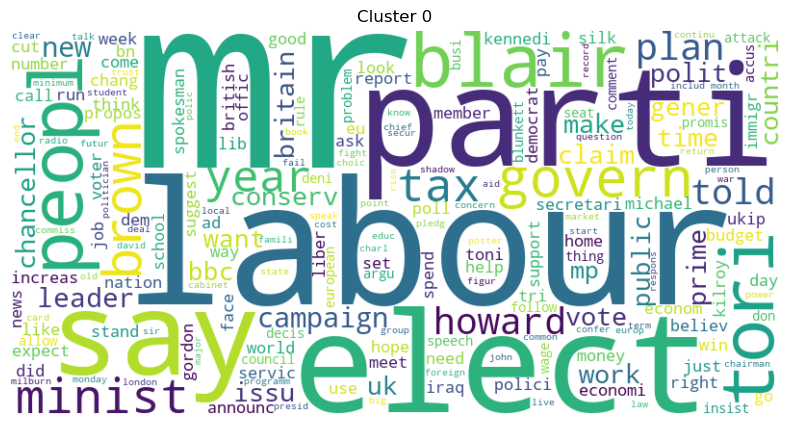

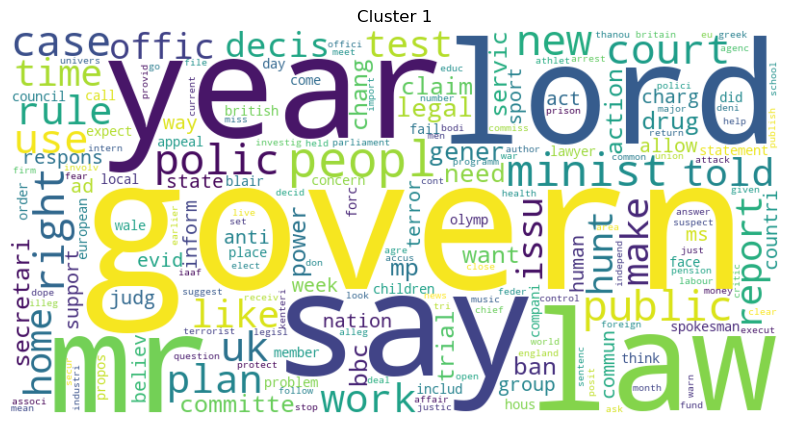

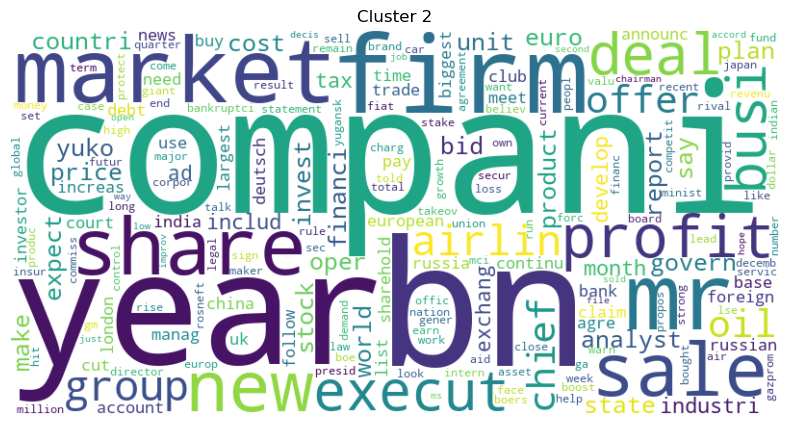

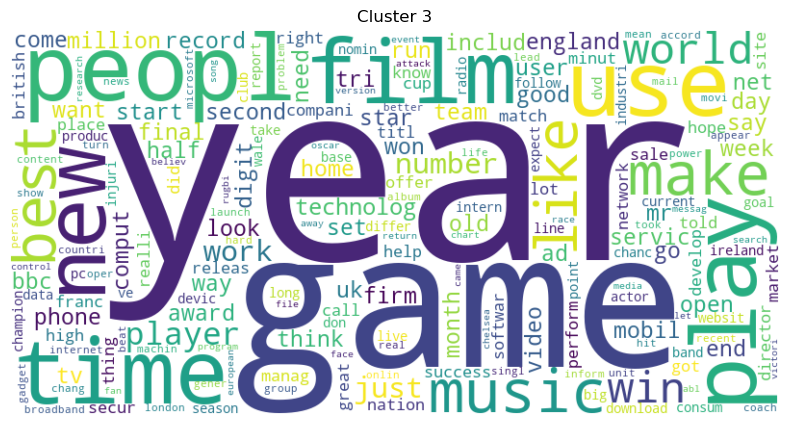

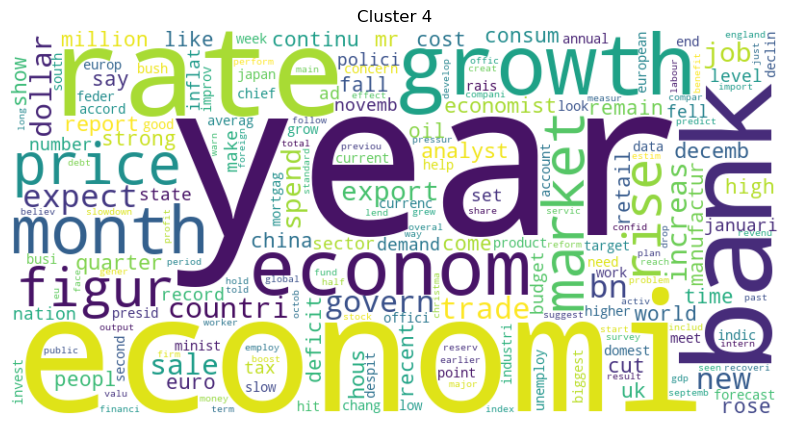

In [150]:
plot_wordclouds(cluster_dict)

_First, I created a cluster_report function as shown in class that takes in the training data (numpy array), and clusters and centroids calculated from the kmeans() function. I initially created the cluster_report function without using the centroids to calculate the Freq by manually calculating it (which I have commented in the code), but later I used the centroids directly (as mentioned in the question) to calculate the Freq, which was much more straightforward. I then created the report as a dataframe that stored the features, freq, DF, and % of docs for the report, setting features as the index for each cluster. Then I stored the report dataframe in a dictionary with cluster labels as keys. I created another display_cluster_summary function that takes in this cluster dictionary that I created, the cluster size, and the number of terms to be displayed for each cluster report summary. Then I sorted them using the Freq (centroid weights) in decreasing order for each term._

_I then created a loop to compute several values of k from 4 to 8, and for each k, I ran the experiment 5 times to check for the best k that would give me the most consistent and meaningful clusters overall._

_From running this experiment, I found that clustering quality varies significantly across different K values. For K=4, Cluster 3 (size 344) demonstrates strong political focus with "mr" (4.59 freq), "labour" (1.77), "govern" (1.74) appearing in 85.17% of documents, while Cluster 2 (size 311) captures technology with "use" (2.61), "technolog" (1.61), "mobil" (1.43). However, sports and entertainment documents remain mixed, indicating vocabulary overlap._

_At K=5, more specialized patterns emerge. Run 1's Cluster 4 (size 67) forms a highly focused gaming cluster where "game" appears with frequency 8.99 in 100% of documents, successfully separating video game content from general sports. Cluster 1 (size 260) isolates entertainment/film content with "film" (2.86), "award" (1.59), "star" (1.27), while Cluster 3 (size 411) captures traditional sports with "play" (1.21), "win" (1.12), "england" (0.93). However, cluster assignments show inconsistency across different runs._

_For K=6-8, clusters become increasingly specialized but unstable. At K=7, extreme specialization occurs with highly focused political subclusters, while at K=8, very small clusters emerge (like a security/email cluster with only 41 documents), suggesting over-segmentation._

_My best clustering was achieved at K=5, Run 1, which successfully identified distinct groups including a specialized gaming cluster, clear political separation, and dedicated entertainment and technology clusters. The most consistent findings across all experiments are: Politics documents cluster most reliably with "mr", "govern", "labour", "elect" as distinguishing features. Technology documents form coherent clusters with "use", "technolog", "mobil". Business and tech categories overlap significantly. Sports and entertainment are hardest to separate, sharing similar language ("year", "best", "win"). Overall, K=5 provides the best balance between meaningful separation and cluster stability._

_Finally, I used the wordcloud Python library to create a function plot_wordclouds, which takes the cluster_dict that I created from cluster_report and plots the word cloud for each cluster, providing a visual representation of the most important terms in each cluster._


#### d. **[5 pts]** Rerun Kmeans on the data using K=5. Using the cluster assignments from your Kmeans clustering and the original category labels assigned to the documents, compare your clusters to the classes by computing the Completeness and Homogeneity scores. The goal is to determine the degree to which automatic clustering can capture the original per-defined categories in the data (note that K=5 may not actually produce the best clusters either qualitatively or in terms of metrics such as Completemess and Homogeneity).


In [151]:
from sklearn.metrics import completeness_score, homogeneity_score

# run Kmeans on the data using K=5
k5_clusters, k5_centroids = kmeans(X_train_np, K=5)

# Compute Completeness and Homogeneity scores
homogeneity_k5 = homogeneity_score(y_train, k5_clusters)
completeness_k5 = completeness_score(y_train, k5_clusters)

print(f'Homogeneity Score: {homogeneity_k5:.4f}')
print(f'Completeness Score: {completeness_k5:.4f}')

Homogeneity Score: 0.7641
Completeness Score: 0.7672


_I used sklearn's homogeneity_score and completeness_score functions to evaluate how well the K-means clustering with K=5 captures the original category labels assigned to the documents. First, I ran kmeans function with K=5 on the training data just like before, then computed both metrics by comparing the predicted cluster labels with the actual category labels from y_train._

_The homogeneity score (0.7641) measures cluster purity i.e. whether each cluster contains only documents from a single category. The completeness score (0.7672) measures whether all documents from each category are grouped together. Both scores range from 0 to 1, where 1 indicates perfect clustering. These scores show that K-means clustering achieves good but imperfect separation of the BBC News categories. This is expected because some categories share similar vocabularies (business/tech, sports/entertainment) as mentioned in the previous question, making them difficult to separate based purely on term frequencies._


#### e. **[10 pts]** Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into the appropriate clusters (using your final clustering results in part b). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the document id, document title, the assigned cluster label, and the Cosine similarity to the corresponding cluster [**Note**: perform this categorization task on all test documents, but for the purpose of the assignment, please only submit the results for the first 20 test documents].

In [152]:
X_test_np = X_test.to_numpy() # Shape: (445, 6167)

# keepdims=True to preserve the dimension so that it doesn't convert into 1D array
X_test_norm = np.linalg.norm(X_test_np, axis=1, keepdims=True) # Shape: (445, 1)
centroids_norm = np.linalg.norm(centroids, axis=1, keepdims=True).T # Shape: (1, 3)

dot_prod = np.dot(X_test_np, centroids.T) # Shape: (445, 3)

# Compute Cosine: divide the dot product by product of the two norms
cosine_sims =  dot_prod / (X_test_norm * centroids_norm) # Shape: (445, 3)

results = []
# get the maximum cosine similarity for each document
for doc in range(len(X_test_np)):
    doc_id = X_test.index[doc] # extracting the original index from X_test dataframe
    title = title_np[doc_id] # title of that index
    cluster = np.argmax(cosine_sims, axis=1)[doc] # returns index of max value
    cos_sim = np.max(cosine_sims, axis=1)[doc] # returns max value

    results.append({
        'Document ID': doc_id, 
        'Document Title': title, 
        'Cluster Label': cluster, 
        'Cosine Similarity': cos_sim
    })

In [153]:
results_df = pd.DataFrame(results)
results_df.head(20)

,Document ID,Document Title,Cluster Label,Cosine Similarity
0,778,Michael film signals 'retirement',0,0.32
1,1628,Wales stars need a rest - Ruddock,0,0.36
2,982,Howard unveils Tory asylum plans,2,0.42
3,1169,The memory driving Brown's mission,2,0.36
4,264,Troubled Marsh under SEC scrutiny,1,0.32
5,887,Halloween writer Debra Hill dies,0,0.32
6,1460,Palace threat over Cantona masks,0,0.14
7,993,Ministers deny care sums 'wrong',2,0.28
8,1139,Research fears over Kelly's views,2,0.21
9,1949,'Ultimate game' award for Doom 3,0,0.46


_First, I normalized both X_test and the centroids using linalg.norm from numpy and kept the dimensions so that it doesn't convert to a 1D array. Then I calculated the dot product of X_test and the centroids transpose to make them multipliable, then calculated the cosine similarity using them. Then I created a results list to store all the document IDs, document titles, the assigned cluster labels, and the cosine similarity to the corresponding cluster for each document. Finally, I converted the list into a dataframe and displayed the top 20 results as required by the question._